In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vila franca do campo pt
kurilsk ru
kokopo pg
butaritari ki
cape town za
bluff nz
iqaluit ca
mar del plata ar
chuy uy
luyang cn
port moresby pg
thompson ca
constitucion cl
belaya gora ru
vila franca do campo pt
hambantota lk
puerto ayora ec
butaritari ki
waddan ly
albany au
nizhneyansk ru
husavik is
airai pw
dikson ru
rikitea pf
ushuaia ar
ishigaki jp
umzimvubu za
hobart au
punta arenas cl
guerrero negro mx
narasannapeta in
jamestown sh
rikitea pf
kapaa us
camana pe
san luis mx
nikolskoye ru
busselton au
butaritari ki
saint-augustin ca
tumannyy ru
laguna br
georgetown sh
barrow us
busselton au
hithadhoo mv
mount gambier au
chicama pe
waipawa nz
aklavik ca
mount gambier au
quelimane mz
punta arenas cl
guelengdeng td
nsunga tz
ushuaia ar
jamestown sh
mataura pf
kapaa us
illoqqortoormiut gl
samusu ws
barrow us
atuona pf
palmer us
paptalaya hn
quirinopolis br
ponta do sol cv
ushuaia ar
tsihombe mg
jamestown sh
mugur-aksy ru
caucaia br
aykhal ru
bethel us
talnakh ru
hithadhoo mv
constitucion

hilo us
mataura pf
belushya guba ru
walvis bay na
castro cl
thompson ca
hobart au
mujiayingzi cn
margate za
goderich sl
santa maria cv
provideniya ru
airai pw
iquique cl
hermanus za
vila franca do campo pt
cherskiy ru
nikolskoye ru
longyearbyen sj
lufilufi ws
zachagansk kz
narasannapeta in
isla mujeres mx
tumannyy ru
punta arenas cl
ushuaia ar
mataura pf
praia cv
clyde river ca
kapaa us
mianyang cn
vzmorye ru
las matas de farfan do
hermanus za
cidreira br
samusu ws
albany au
cape town za
bethel us
albany au
san jose gt
ilulissat gl
mataura pf
pacifica us
mar del plata ar
illoqqortoormiut gl
meadow lake ca
gornopravdinsk ru
butaritari ki
samusu ws
hasaki jp
vestmannaeyjar is
beyneu kz
tumannyy ru
mazamari pe
hilo us
emborion gr
bonthe sl
klerksdorp za
punta arenas cl
vardo no
mataura pf
ardakan ir
vila franca do campo pt
iranshahr ir
maldonado uy
tsiroanomandidy mg
albany au
bairiki ki
belushya guba ru
calvinia za
avarua ck
port elizabeth za
ambulu id
rikitea pf
busselton au
evensk ru
a

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=" + weather_api_key


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

print(weather_api_key) 

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------
8c54de1cd0f05d77fe9a6451e17e880e


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url) 
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


print(len(city_data))

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [8]:
print(city_data[0])

{'City': 'Vila Franca Do Campo', 'Lat': 37.7167, 'Lng': -25.4333, 'Max Temp': 59, 'Humidity': 67, 'Cloudiness': 75, 'Wind Speed': 17.27, 'Country': 'PT', 'Date': '2021-04-23 23:45:54'}


In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Franca Do Campo,37.7167,-25.4333,59.00,67,75,17.27,PT,2021-04-23 23:45:54
1,Kurilsk,45.2333,147.8833,40.37,74,100,12.33,RU,2021-04-23 23:45:54
2,Kokopo,-4.3520,152.2633,79.97,77,99,5.86,PG,2021-04-23 23:44:20
3,Butaritari,3.0707,172.7902,82.13,77,82,8.84,KI,2021-04-23 23:45:55
4,Cape Town,-33.9258,18.4232,57.99,88,0,6.91,ZA,2021-04-23 23:42:24
5,Bluff,-46.6000,168.3333,53.01,85,88,1.99,NZ,2021-04-23 23:45:56
6,Iqaluit,63.7506,-68.5145,28.40,93,90,2.30,CA,2021-04-23 23:45:56
7,Mar Del Plata,-38.0023,-57.5575,69.01,83,0,9.22,AR,2021-04-23 23:45:00
8,Chuy,-33.6971,-53.4616,66.54,84,13,12.66,UY,2021-04-23 23:45:57
9,Luyang,27.6239,110.0989,65.17,97,100,3.62,CN,2021-04-23 23:45:57


In [10]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Franca Do Campo,PT,2021-04-23 23:45:54,37.7167,-25.4333,59.00,67,75,17.27
1,Kurilsk,RU,2021-04-23 23:45:54,45.2333,147.8833,40.37,74,100,12.33
2,Kokopo,PG,2021-04-23 23:44:20,-4.3520,152.2633,79.97,77,99,5.86
3,Butaritari,KI,2021-04-23 23:45:55,3.0707,172.7902,82.13,77,82,8.84
4,Cape Town,ZA,2021-04-23 23:42:24,-33.9258,18.4232,57.99,88,0,6.91
...,...,...,...,...,...,...,...,...,...
569,Ossora,RU,2021-04-23 23:49:26,59.2353,163.0719,32.65,95,100,7.05
570,Stonewall,CA,2021-04-23 23:49:26,50.1344,-97.3268,37.00,38,75,10.36
571,Novobataysk,RU,2021-04-23 23:49:26,46.8981,39.7819,51.01,93,100,7.00
572,Vitim,RU,2021-04-23 23:48:14,59.4511,112.5578,33.51,93,100,6.33


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/23/21'

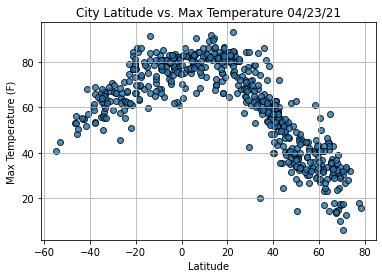

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

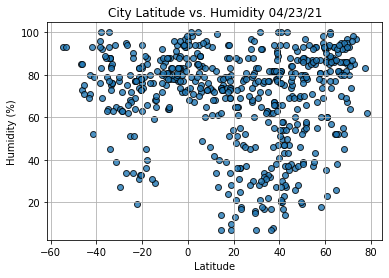

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

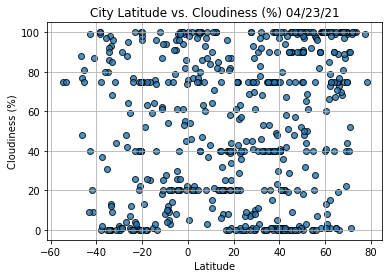

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

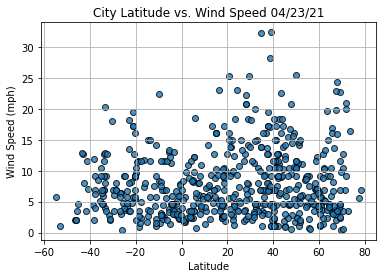

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

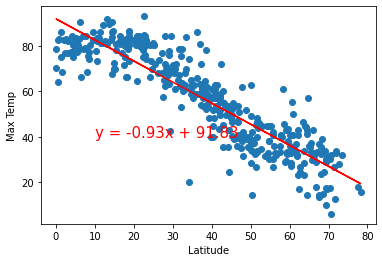

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

 # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

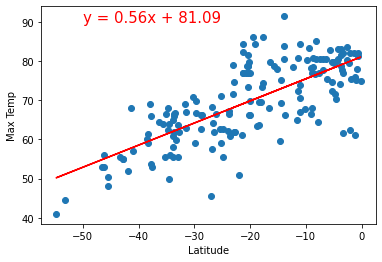

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

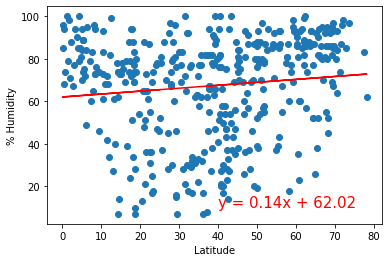

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

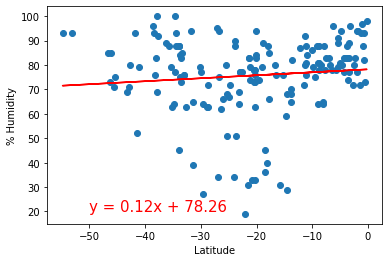

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

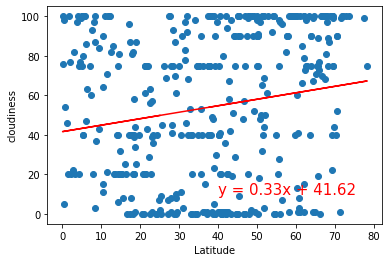

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'cloudiness',(40,10))

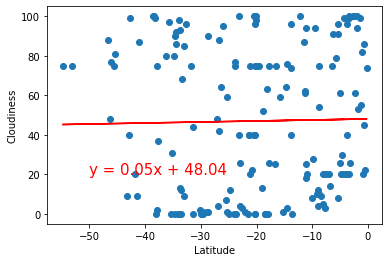

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,20))

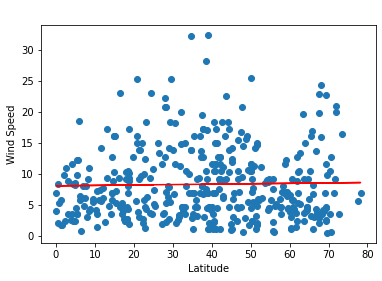

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

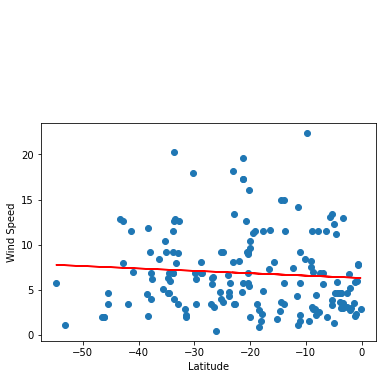

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))